# Age Verification using Computer Vision for Age-Restricted Product Sales Compliance

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Introduction" data-toc-modified-id="1-Introduction-1">1 Introduction</a></span><ul class="toc-item"><li><span><a href="#1.1-Project-Description" data-toc-modified-id="1.1-Project-Description-1.1">1.1 Project Description</a></span></li><li><span><a href="#1.2-Objective" data-toc-modified-id="1.2-Objective-1.2">1.2 Objective</a></span></li><li><span><a href="#1.3-Data-Description" data-toc-modified-id="1.3-Data-Description-1.3">1.3 Data Description</a></span></li><li><span><a href="#1.4-Stages" data-toc-modified-id="1.4-Stages-1.4">1.4 Stages</a></span></li></ul></li><li><span><a href="#2-Load-and-Read-the-Data" data-toc-modified-id="2-Load-and-Read-the-Data-2">2 Load and Read the Data</a></span><ul class="toc-item"><li><span><a href="#2.1-Import-Libraries" data-toc-modified-id="2.1-Import-Libraries-2.1">2.1 Import Libraries</a></span></li><li><span><a href="#2.2-Load-the-Data" data-toc-modified-id="2.2-Load-the-Data-2.2">2.2 Load the Data</a></span></li></ul></li><li><span><a href="#3-Exploratory-Data-Analysis" data-toc-modified-id="3-Exploratory-Data-Analysis-3">3 Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#3.1-Descriptive-Statistics" data-toc-modified-id="3.1-Descriptive-Statistics-3.1">3.1 Descriptive Statistics</a></span></li><li><span><a href="#3.2-Data-Sample-Visualization" data-toc-modified-id="3.2-Data-Sample-Visualization-3.2">3.2 Data Sample Visualization</a></span></li><li><span><a href="#3.3-Augmentation-Analysis" data-toc-modified-id="3.3-Augmentation-Analysis-3.3">3.3 Augmentation Analysis</a></span></li><li><span><a href="#3.4-Class-Distribution-Analysis" data-toc-modified-id="3.4-Class-Distribution-Analysis-3.4">3.4 Class Distribution Analysis</a></span></li><li><span><a href="#3.5-Image-Quality-Analysis" data-toc-modified-id="3.5-Image-Quality-Analysis-3.5">3.5 Image Quality Analysis</a></span></li></ul></li><li><span><a href="#4-Modeling" data-toc-modified-id="4-Modeling-4">4 Modeling</a></span></li><li><span><a href="#5-Prepare-Script-to-Run-on-GPU-Platform" data-toc-modified-id="5-Prepare-Script-to-Run-on-GPU-Platform-5">5 Prepare Script to Run on GPU Platform</a></span><ul class="toc-item"><li><span><a href="#5.1-Prepare-the-Script" data-toc-modified-id="5.1-Prepare-the-Script-5.1">5.1 Prepare the Script</a></span></li><li><span><a href="#5.2-Show-the-Output" data-toc-modified-id="5.2-Show-the-Output-5.2">5.2 Show the Output</a></span></li></ul></li><li><span><a href="#6-Conclusion" data-toc-modified-id="6-Conclusion-6">6 Conclusion</a></span></li></ul></div>

## 1 Introduction

### 1.1 Project Description

Good Seed, a supermarket chain, has initiated a project to explore the application of Data Science in assisting them to comply with age-restriction laws. They seek to ensure that they are not selling age-restricted products to customers who are underage.

The company has equipped their stores with cameras in the cashier area, which can detect age-restricted products during transactions. In order to verify a person's age, they aim to employ computer vision techniques capable of determining an individual's age from a photograph.

We completed this project on Practicum's or TripleTen's platform, utilizing their GPU facilities to expedite the machine learning process. Below, we present the results obtained.

### 1.2 Objective

The objective of this project is to build and evaluate a model that can accurately verify a person's age based on the photographs captured by the cameras in the cashier area. By doing so, Good Seed aims to ensure compliance with age-restriction regulations, prevent sales to underage customers, and uphold legal requirements.

Our task is to build and train a convolutional neural network on a GPU platform using a dataset containing human photographs. The objective is to achieve an MAE score of no greater than 8 for the test set. 

### 1.3 Data Description

The required datasets are stored in the `/datasets/faces/` folder on Practicum Platform and include the following:

- The `final_file` folder containing approximately 7.6k photos.
- The file `labels.csv`, which contains the corresponding labels for the images, with two columns: `file_name` and `real_age`.

Due to the large number of image files, it is advisable not to read them all simultaneously, as it may consume excessive computing resources. Instead, we recommend using the ImageDataGenerator to create a generator.

The file containing labels, `labels.csv`, can be easily loaded as a plain CSV file, providing convenient access to the associated image labels for further processing and analysis.

### 1.4 Stages

This project will be completed through the following stages:

- Import computer vision libraries and load the available data.
- Conduct exploratory data analysis, including descriptive statistics, visualization of sample data, augmentation analysis, class distribution analysis, and image quality analysis.
- Proceed to the modeling phase, where functions will be created for execution on Practicum's GPU platform.
- Develop coding scripts based on the functions to be executed on the GPU platform.
- Record the output from the GPU platform in markdown cells.

## 2 Load and Read the Data 

### 2.1 Import Libraries

In [1]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

import os
import random
import inspect

### 2.2 Load the Data

We load data from the Practicum platform; we do not store it in our own directory.

In [2]:
# Load the data
labels = pd.read_csv('/datasets/faces/labels.csv')

# Create data generator with horizontal flip augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True)

# Perform data extraction
datagen_flow = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=12345,
) 


Found 7591 validated image filenames.


## 3 Exploratory Data Analysis

### 3.1 Descriptive Statistics

In [3]:
# Get descriptive statistics of numeric attributes (for example, image size)
image_sizes = labels['file_name'].apply(
    lambda x: plt.imread('/datasets/faces/final_files/' + x).shape[:2])
image_sizes.describe()

count           7591
unique          2293
top       (517, 517)
freq              37
Name: file_name, dtype: object

**Findings:**
- There are 7591 images in `final_files`.
- The dataset contains 2293 unique image sizes, indicating variations in image sizes.
- The most frequently occurring image size in the dataset is (517, 517).
- The frequency of the most common image size is 37, meaning there are 37 images in the dataset with size (517, 517), which is the highest count among all image sizes.

### 3.2 Data Sample Visualization

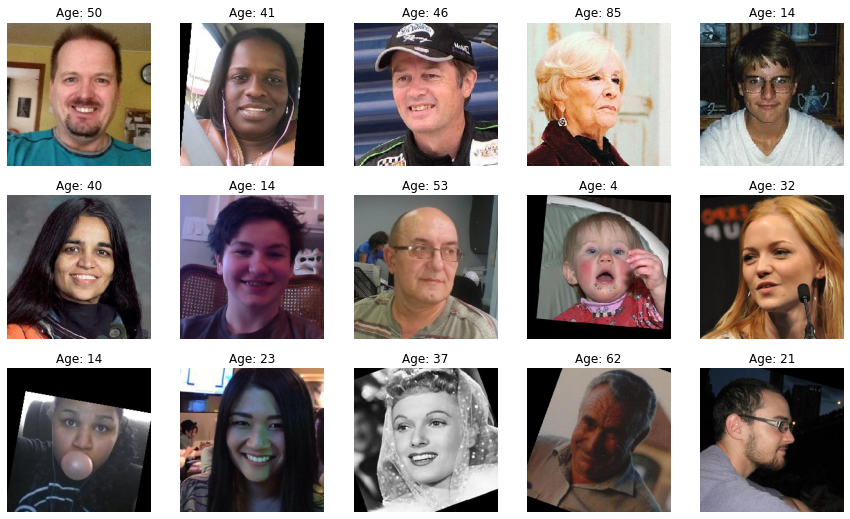

In [4]:
# Shows some sample images from the dataset
sample_images, sample_labels = next(datagen_flow)  # # Take a batch of samples
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(sample_images[i])
    ax.set_title('Age: ' + str(sample_labels[i]))
    ax.axis('off')
plt.show()


**Findings:**
- The images used for this training are close-up and focused on faces.
- The images are clear and of good quality.
- Various angles of faces are displayed in the images.
- Some pictures are in color, while others are in black and white.
- The images represent a wide range of ages.
- Both men and women are represented in the samples.
- The images include examples of faces from different races.
- Overall, the images meet the training requirements of this model.

### 3.3 Augmentation Analysis

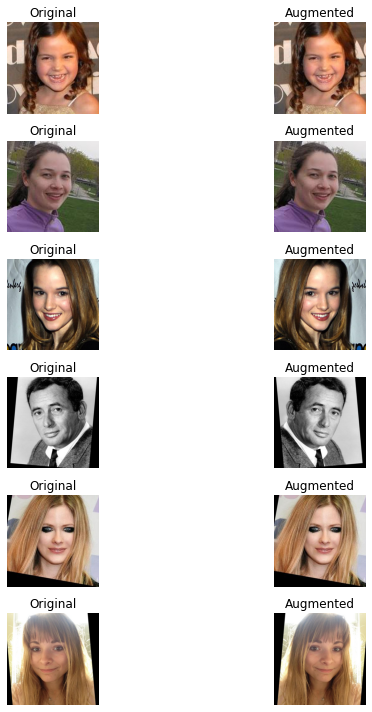

In [5]:
# Path to image directory
image_dir = '/datasets/faces/final_files/'

# Get a list of image files from a directory
image_files = os.listdir(image_dir)

# Selecting multiple images randomly
num_images = 6  # Number of images to display
selected_images = random.sample(image_files, num_images)

# Displays the original image and the augmentation result
fig, axes = plt.subplots(num_images, 2, figsize=(10, 10))

for i, image_file in enumerate(selected_images):
    # Load original image
    image_path = os.path.join(image_dir, image_file)
    image = load_img(image_path)
    image_array = img_to_array(image)
    
    # Displays the original image
    axes[i, 0].imshow(image_array.astype(int))
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')
    
    # Generate augmentation using ImageDataGenerator
    augmented_image = datagen.random_transform(image_array)
    
    # Displays the augmentation result image
    axes[i, 1].imshow(augmented_image.astype(int))
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Augmented')
    
plt.tight_layout()
plt.show()


**Findings:**
- Augmentation with horizontal flip is successful.
- Not all images are augmented, as the horizontal flip probability is set to 0.5 by default for the `horizontal_flip=True` argument in ImageDataGenerator. This means that each image has a 50% chance of being flipped.

### 3.4 Class Distribution Analysis

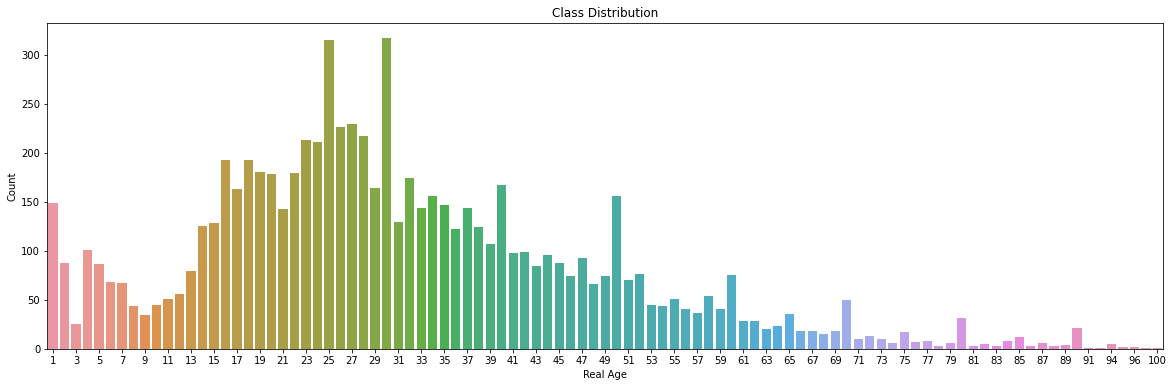

In [6]:
# Count the number of samples in each class
class_counts = labels['real_age'].value_counts()

# Create a bar chart visualization for class distribution
plt.figure(figsize=(20, 6))
sns.countplot(data=labels, x='real_age')
plt.xlabel('Real Age')
plt.ylabel('Count')
plt.title('Class Distribution')

# Sets the labels on the x-axis to show only odd numbers
plt.xticks(range(0, len(class_counts), 2))

plt.show()


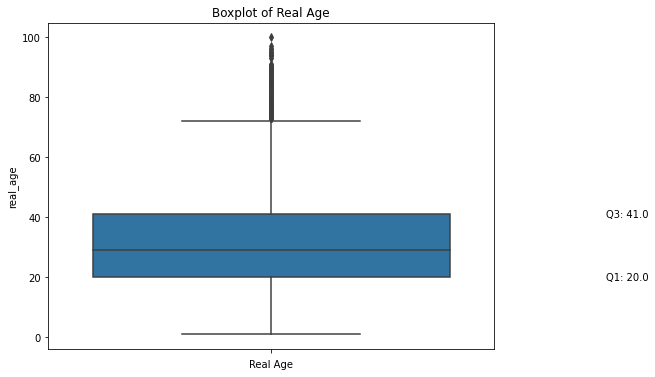

In [7]:
# Check data distribution in column 'real_age'
plt.figure(figsize=(8, 6))
sns.boxplot(data=labels, y='real_age')
plt.xlabel('Real Age')
plt.title('Boxplot of Real Age')

# Get the value of Q1 and Q3
q1 = labels['real_age'].quantile(0.25)
q3 = labels['real_age'].quantile(0.75)

# Added Q1 and Q3 text
plt.text(0.75, q1, f'Q1: {q1}', va='center')
plt.text(0.75, q3, f'Q3: {q3}', va='center')

plt.show()


**Findings:**
- The image data we obtained covers an age range from 1 to 100 years.
- The majority of samples are concentrated around young adults, specifically in the age range of 20-41 years.
- Data for samples of very old age or over 70 years is relatively limited.

### 3.5 Image Quality Analysis

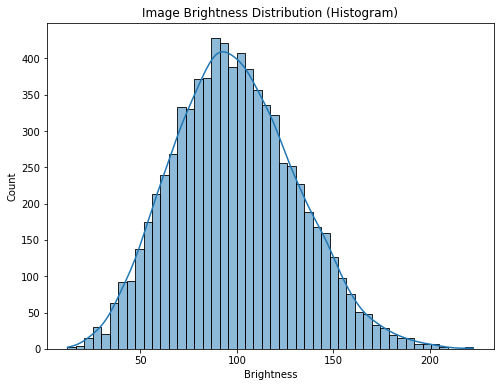

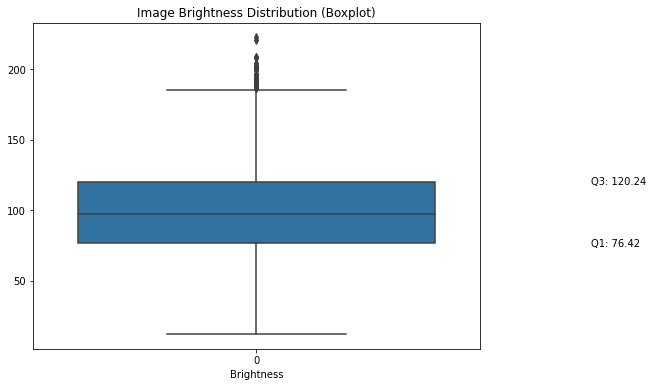

In [8]:
brightness_values = labels['file_name'].apply(lambda x: plt.imread('/datasets/faces/final_files/' + x).mean())

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(brightness_values, kde=True)
plt.xlabel('Brightness')
plt.ylabel('Count')
plt.title('Image Brightness Distribution (Histogram)')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=brightness_values)
plt.xlabel('Brightness')
plt.title('Image Brightness Distribution (Boxplot)')

# Add Q1 text
plt.text(0.75, brightness_values.quantile(0.25), f'Q1: {brightness_values.quantile(0.25):.2f}', va='center')
# Add Q3 text
plt.text(0.75, brightness_values.quantile(0.75), f'Q3: {brightness_values.quantile(0.75):.2f}', va='center')

plt.show()


**Findings:**
- Overall, the image brightness levels in the obtained data are concentrated between 76 and 120.
- However, the entire brightness spectrum is adequately represented in the existing image data.

## 4 Modeling

Here, we will define the required functions to train our model on the GPU platform and create a single script containing these functions, along with an initialization section.

In [9]:
def load_train(path):
    
    """
    This code loads the training set portion of the file path
    """
    
    # Create a data generator for training with horizontal flip augmentation
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True)
    # Extract data for training
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345,
    ) 

    return train_datagen_flow

In [10]:
def load_test(path):
    
    """
    This code loads the validation set/test set part of the file path
    """
    
    # Create a data generator for testing without augmentation
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    # Extract data for testing
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345,
    ) 

    return test_datagen_flow

In [11]:
def create_model(input_shape=(224, 224, 3)):
    
    """
    This code defines the model
    """
    
    # Build a model with ResNet50 as the backbone 
    backbone = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=30,
                steps_per_epoch=None, validation_steps=None):

    """
    Train the model with the given parameters
    """
    # Keeps the best model weight during training
    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_mae', save_best_only=True, mode='min', verbose=1)

        
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=[checkpoint],
        verbose=2
    )
    # Loading weight of the best models
    model.load_weights("best_model.h5")
    
    return model


## 5 Prepare Script to Run on GPU Platform

After defining the necessary functions, we can create a script for the GPU platform, download it via the "File | Open..." menu, and upload it to run on the Practicum GPU platform.

We will build and train a convolutional neural network with a target MAE score of less than 8 for the test set. To achieve this, we conducted several experiments to identify the best model that could achieve the desired MAE score.

Below, we present the best results we have achieved.

### 5.1 Prepare the Script

In [13]:
# Prepare a script to run on the GPU platform


init_str = """
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
        

def load_train(path):
    
    """
    This code loads the training set portion of the file path
    """
    
    # Create a data generator for training with horizontal flip augmentation
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True)
    # Extract data for training
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345,
    ) 

    return train_datagen_flow


def load_test(path):
    
    """
    This code loads the validation set/test set part of the file path
    """
    
    # Create a data generator for testing without augmentation
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    # Extract data for testing
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345,
    ) 

    return test_datagen_flow


def create_model(input_shape=(224, 224, 3)):
    
    """
    This code defines the model
    """
    
    # Build a model with ResNet50 as the backbone 
    backbone = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=30,
                steps_per_epoch=None, validation_steps=None):

    """
    Train the model with the given parameters
    """
    # Keeps the best model weight during training
    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_mae', save_best_only=True, mode='min', verbose=1)

        
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=[checkpoint],
        verbose=2
    )
    # Loading weight of the best models
    model.load_weights("best_model.h5")
    
    return model


### 5.2 Show the Output

We have executed the script we compiled on Practicum's GPU platform. Below, we display the *output* of the GPU platform as a *Markdown* cell.

```
2023-05-24 14:24:35.383402: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-05-24 14:24:35.456684: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 7591 validated image filenames.
Found 7591 validated image filenames.
2023-05-24 14:24:40.793821: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-05-24 14:24:40.968193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:40.968388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-05-24 14:24:40.968427: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-05-24 14:24:40.968463: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-05-24 14:24:41.051314: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-05-24 14:24:41.067428: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-05-24 14:24:41.260162: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-05-24 14:24:41.278145: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-05-24 14:24:41.278203: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-05-24 14:24:41.278321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:41.278574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:41.278703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-05-24 14:24:41.279018: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-05-24 14:24:41.309753: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300020000 Hz
2023-05-24 14:24:41.311713: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3c9d0d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-24 14:24:41.311741: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-05-24 14:24:41.467022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:41.467306: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1adb720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 14:24:41.467327: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-05-24 14:24:41.467546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:41.467728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-05-24 14:24:41.467773: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-05-24 14:24:41.467789: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-05-24 14:24:41.467812: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-05-24 14:24:41.467824: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-05-24 14:24:41.467840: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-05-24 14:24:41.467849: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-05-24 14:24:41.467859: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-05-24 14:24:41.467943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:41.468149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:41.468307: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-05-24 14:24:41.469726: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-05-24 14:24:43.890648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-05-24 14:24:43.890692: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-05-24 14:24:43.890703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-05-24 14:24:43.892154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:43.892397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-24 14:24:43.892570: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-05-24 14:24:43.892611: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14988 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
 6184960/94765736 [>.............................] - ETA: 0s
14409728/94765736 [===>..........................] - ETA: 0s
24100864/94765736 [======>.......................] - ETA: 0s
25174016/94765736 [======>.......................] - ETA: 0s
32120832/94765736 [=========>....................] - ETA: 0s
41951232/94765736 [============>.................] - ETA: 0s
50339840/94765736 [==============>...............] - ETA: 0s
56016896/94765736 [================>.............] - ETA: 0s
65732608/94765736 [===================>..........] - ETA: 0s
74907648/94765736 [======================>.......] - ETA: 0s
84238336/94765736 [=========================>....] - ETA: 0s
92487680/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 1s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 238 steps, validate for 238 steps
Epoch 1/30
2023-05-24 14:25:03.759481: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-05-24 14:25:04.995418: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

Epoch 00001: val_mae improved from inf to 16.71360, saving model to best_model.h5
238/238 - 104s - loss: 333.5294 - mae: 13.5628 - val_loss: 481.3409 - val_mae: 16.7136
Epoch 2/30

Epoch 00002: val_mae did not improve from 16.71360
238/238 - 75s - loss: 149.8576 - mae: 9.2543 - val_loss: 538.2184 - val_mae: 17.9341
Epoch 3/30

Epoch 00003: val_mae improved from 16.71360 to 13.48482, saving model to best_model.h5
238/238 - 76s - loss: 116.7000 - mae: 8.1501 - val_loss: 315.0450 - val_mae: 13.4848
Epoch 4/30

Epoch 00004: val_mae improved from 13.48482 to 9.86226, saving model to best_model.h5
238/238 - 76s - loss: 102.2300 - mae: 7.6011 - val_loss: 155.8347 - val_mae: 9.8623
Epoch 5/30

Epoch 00005: val_mae improved from 9.86226 to 7.18481, saving model to best_model.h5
238/238 - 76s - loss: 89.9354 - mae: 7.0893 - val_loss: 83.3440 - val_mae: 7.1848
Epoch 6/30

Epoch 00006: val_mae did not improve from 7.18481
238/238 - 74s - loss: 77.9785 - mae: 6.5915 - val_loss: 154.2206 - val_mae: 10.0221
Epoch 7/30

Epoch 00007: val_mae did not improve from 7.18481
238/238 - 74s - loss: 71.9717 - mae: 6.3061 - val_loss: 137.6718 - val_mae: 9.1917
Epoch 8/30

Epoch 00008: val_mae did not improve from 7.18481
238/238 - 74s - loss: 67.7100 - mae: 6.1459 - val_loss: 167.2825 - val_mae: 10.1259
Epoch 9/30

Epoch 00009: val_mae did not improve from 7.18481
238/238 - 74s - loss: 60.4690 - mae: 5.8279 - val_loss: 158.1488 - val_mae: 10.2237
Epoch 10/30

Epoch 00010: val_mae did not improve from 7.18481
238/238 - 74s - loss: 56.4193 - mae: 5.5982 - val_loss: 203.0248 - val_mae: 12.3636
Epoch 11/30

Epoch 00011: val_mae did not improve from 7.18481
238/238 - 74s - loss: 53.3548 - mae: 5.3704 - val_loss: 180.7819 - val_mae: 11.3697
Epoch 12/30

Epoch 00012: val_mae did not improve from 7.18481
238/238 - 74s - loss: 52.1166 - mae: 5.3018 - val_loss: 196.0684 - val_mae: 12.1542
Epoch 13/30

Epoch 00013: val_mae did not improve from 7.18481
238/238 - 74s - loss: 49.5588 - mae: 5.2862 - val_loss: 176.1405 - val_mae: 11.2598
Epoch 14/30

Epoch 00014: val_mae did not improve from 7.18481
238/238 - 74s - loss: 48.9525 - mae: 5.1402 - val_loss: 252.0258 - val_mae: 13.3125
Epoch 15/30

Epoch 00015: val_mae did not improve from 7.18481
238/238 - 74s - loss: 48.1322 - mae: 5.1198 - val_loss: 277.2289 - val_mae: 14.2866
Epoch 16/30

Epoch 00016: val_mae did not improve from 7.18481
238/238 - 74s - loss: 45.4755 - mae: 4.9422 - val_loss: 267.5869 - val_mae: 14.3849
Epoch 17/30

Epoch 00017: val_mae did not improve from 7.18481
238/238 - 74s - loss: 42.2256 - mae: 4.8231 - val_loss: 328.4525 - val_mae: 15.7797
Epoch 18/30

Epoch 00018: val_mae did not improve from 7.18481
238/238 - 74s - loss: 42.1057 - mae: 4.7303 - val_loss: 295.7717 - val_mae: 14.6307
Epoch 19/30

Epoch 00019: val_mae did not improve from 7.18481
238/238 - 74s - loss: 39.1220 - mae: 4.5871 - val_loss: 322.5907 - val_mae: 15.3521
Epoch 20/30

Epoch 00020: val_mae did not improve from 7.18481
238/238 - 74s - loss: 39.2737 - mae: 4.6294 - val_loss: 325.6561 - val_mae: 15.3901
Epoch 21/30

Epoch 00021: val_mae did not improve from 7.18481
238/238 - 74s - loss: 38.1204 - mae: 4.5164 - val_loss: 321.0387 - val_mae: 15.0642
Epoch 22/30

Epoch 00022: val_mae did not improve from 7.18481
238/238 - 74s - loss: 38.4072 - mae: 4.5598 - val_loss: 310.0977 - val_mae: 15.1776
Epoch 23/30

Epoch 00023: val_mae did not improve from 7.18481
238/238 - 74s - loss: 35.9055 - mae: 4.4456 - val_loss: 350.0418 - val_mae: 16.3444
Epoch 24/30

Epoch 00024: val_mae did not improve from 7.18481
238/238 - 74s - loss: 34.4370 - mae: 4.3142 - val_loss: 303.9835 - val_mae: 15.0041
Epoch 25/30

Epoch 00025: val_mae did not improve from 7.18481
238/238 - 74s - loss: 37.3488 - mae: 4.4231 - val_loss: 321.8176 - val_mae: 15.3289
Epoch 26/30

Epoch 00026: val_mae did not improve from 7.18481
238/238 - 74s - loss: 35.7464 - mae: 4.3769 - val_loss: 400.0425 - val_mae: 17.2389
Epoch 27/30

Epoch 00027: val_mae did not improve from 7.18481
238/238 - 74s - loss: 34.2570 - mae: 4.2955 - val_loss: 397.7540 - val_mae: 17.3466
Epoch 28/30

Epoch 00028: val_mae did not improve from 7.18481
238/238 - 75s - loss: 33.5175 - mae: 4.2521 - val_loss: 338.8508 - val_mae: 15.5611
Epoch 29/30

Epoch 00029: val_mae did not improve from 7.18481
238/238 - 74s - loss: 33.0286 - mae: 4.2204 - val_loss: 416.0605 - val_mae: 17.3992
Epoch 30/30

Epoch 00030: val_mae did not improve from 7.18481
238/238 - 74s - loss: 34.0030 - mae: 4.2648 - val_loss: 415.9600 - val_mae: 17.2986
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
238/238 - 36s - loss: 83.3440 - mae: 7.1848
Test MAE: 7.1848


```




## 6 Conclusion

- An exploratory data analysis of the dataset was performed, and it was concluded that the data quality is sufficient for training without problems.
- After several adjustments during the training process, the final model achieved a *mean absolute error* (MAE) score of 7.1848. The MAE value of 7.1848 indicates that, on average, the model's predictions of human ages can deviate by up to 7.1848 years.
- The ModelCheckpoint callback provided by TensorFlow was used to retrieve results from the best MAE during model training and avoid fetching results from the last epoch, which may not reflect the best performance. The best model training was found in the 5th epoch after training for 30 epochs.

# Checklist

- [x] Notebook opened
- [x] Code is free of errors
- [x] Code cells are organized in the order of execution
- [x] Exploratory data analysis has been conducted
- [x] The results of the exploratory data analysis are presented in the final notebook
- [x] The model achieves an MAE score of less than 8
- [x] Model training code has been transferred to the final notebook
- [x] Output of the model training has been included in the final notebook
- [x] Findings have been provided based on the results of model training.